In [1]:
import requests

url = "https://finance.naver.com/item/sise_day.naver?code=005930&&page=2"

page = requests.get(url)

print(page.text)


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버 :: 세상의 모든 지식, 네이버</title>

<style type="text/css">
.error_content * {margin:0;padding:0;}
.error_content img{border:none;}
.error_content em {font-style:normal;}
.error_content {width:410px; margin:80px auto 0; padding:57px 0 0 0; font-size:12px; font-family:"나눔고딕", "NanumGothic", "돋움", Dotum, AppleGothic, Sans-serif; text-align:left; line-height:14px; background:url(https://ssl.pstatic.net/static/common/error/090610/bg_thumb.gif) no-repeat center top; white-space:nowrap;}
.error_content p{margin:0;}
.error_content .error_desc {margin-bottom:21px; overflow:hidden; text-align:center;}
.error_content .error_desc2 {margin-bottom:11px; padding-bottom:7px; color:#888; line-height:18px; border-bottom:1px solid #eee;}
.error_content .error_desc3 {clear:both; color:#888;}
.error_content .error_desc3

In [2]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [3]:
my_headers = {'user-agent': 'Mozilla/5.0'}

page = requests.get(url, headers=my_headers)

print(page.text)


<html lang="ko">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버페이 증권</title>

<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20250625165007/css/newstock.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20250625165007/css/common.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20250625165007/css/finance_header.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20250625165007/css/layout.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20250625165007/css/main.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20250625165007/css/newstock2.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20250625165007/css/newstock3.css">
<link rel="stylesheet" type

In [4]:
import pandas as pd
from io import StringIO
html_content = StringIO(page.text)
pages = pd.read_html(html_content)
type(pages)

list

In [5]:
len(pages)

2

In [6]:
pages[0]

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025.06.12,59500.0,하락 400,59700.0,60000.0,59300.0,17755115.0
2,2025.06.11,59900.0,상승 700,59500.0,60100.0,59400.0,13610734.0
3,2025.06.10,59200.0,하락 600,60000.0,60100.0,58800.0,15305760.0
4,2025.06.09,59800.0,상승 700,60400.0,60400.0,59500.0,19609659.0
5,2025.06.05,59100.0,"상승 1,300",58100.0,59900.0,57900.0,23266027.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2025.06.04,57800.0,"상승 1,000",57200.0,57900.0,56800.0,19649983.0


In [7]:
pages[1]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,맨앞,1,2,3,4,5,6,7,8,9,10,다음,맨뒤


In [8]:
new_url = "https://finance.naver.com/item/sise_day.naver?code=005930&&page="

all_tables = pd.DataFrame()

In [9]:
for page_number in range(1, 2):
    full_url = new_url + str(page_number)
    print(f'{page_number} 번째 페이지 읽어오기({full_url})')
    page = requests.get(full_url, headers=my_headers)
    table = pd.read_html(page.text)[0]
    print(f'전체 {len(all_tables.index)} 줄에 {len(table.index)} 줄을 추가합니다.')
    all_tables = pd.concat([all_tables, table])

1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&&page=1)
전체 0 줄에 15 줄을 추가합니다.


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\1025321238.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]


In [10]:
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025.06.26,60200.0,"하락 1,100",61300.0,61300.0,59900.0,19217977.0
2,2025.06.25,61300.0,상승 800,61500.0,61600.0,60300.0,23933612.0
3,2025.06.24,60500.0,"상승 2,500",59400.0,60600.0,59300.0,23737899.0
4,2025.06.23,58000.0,"하락 1,500",58400.0,58500.0,57600.0,16551694.0
5,2025.06.20,59500.0,상승 300,59400.0,59800.0,59100.0,18072251.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2025.06.19,59200.0,하락 600,60500.0,60600.0,59000.0,16876278.0


In [11]:
all_tables.dropna(inplace=True)
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2025.06.26,60200.0,"하락 1,100",61300.0,61300.0,59900.0,19217977.0
2,2025.06.25,61300.0,상승 800,61500.0,61600.0,60300.0,23933612.0
3,2025.06.24,60500.0,"상승 2,500",59400.0,60600.0,59300.0,23737899.0
4,2025.06.23,58000.0,"하락 1,500",58400.0,58500.0,57600.0,16551694.0
5,2025.06.20,59500.0,상승 300,59400.0,59800.0,59100.0,18072251.0
9,2025.06.19,59200.0,하락 600,60500.0,60600.0,59000.0,16876278.0
10,2025.06.18,59800.0,"상승 1,700",58000.0,59800.0,57900.0,17620705.0
11,2025.06.17,58100.0,상승 900,57800.0,59800.0,57400.0,28637003.0
12,2025.06.16,57200.0,"하락 1,100",58000.0,58100.0,56900.0,22200872.0
13,2025.06.13,58300.0,"하락 1,200",60200.0,60200.0,57700.0,20705979.0


In [12]:
all_tables = pd.DataFrame()
for page_number in range(1, 11):
    full_url = new_url + str(page_number)
    print(f'{page_number} 번째 페이지 읽어오기({full_url})')
    page = requests.get(full_url, headers=my_headers)
    table = pd.read_html(page.text)[0]
    print(f'전체 {len(all_tables.index)} 줄에 {len(table.index)} 줄을 추가합니다.')
    all_tables = pd.concat([all_tables, table])

1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&&page=1)
전체 0 줄에 15 줄을 추가합니다.
2 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&&page=2)


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\1803851077.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\1803851077.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\1803851077.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]


전체 15 줄에 15 줄을 추가합니다.
3 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&&page=3)
전체 30 줄에 15 줄을 추가합니다.
4 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&&page=4)


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\1803851077.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]


전체 45 줄에 15 줄을 추가합니다.
5 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&&page=5)
전체 60 줄에 15 줄을 추가합니다.
6 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&&page=6)


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\1803851077.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\1803851077.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\1803851077.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\1803851077.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. 

전체 75 줄에 15 줄을 추가합니다.
7 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&&page=7)
전체 90 줄에 15 줄을 추가합니다.
8 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&&page=8)
전체 105 줄에 15 줄을 추가합니다.
9 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&&page=9)


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\1803851077.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]


전체 120 줄에 15 줄을 추가합니다.
10 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&&page=10)
전체 135 줄에 15 줄을 추가합니다.


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\1803851077.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]


In [13]:
all_tables.dropna(inplace=True)
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2025.06.26,60200.0,"하락 1,100",61300.0,61300.0,59900.0,19217977.0
2,2025.06.25,61300.0,상승 800,61500.0,61600.0,60300.0,23933612.0
3,2025.06.24,60500.0,"상승 2,500",59400.0,60600.0,59300.0,23737899.0
4,2025.06.23,58000.0,"하락 1,500",58400.0,58500.0,57600.0,16551694.0
5,2025.06.20,59500.0,상승 300,59400.0,59800.0,59100.0,18072251.0
...,...,...,...,...,...,...,...
9,2025.02.05,52900.0,상승 200,53600.0,53800.0,52800.0,15974885.0
10,2025.02.04,52700.0,"상승 1,700",51600.0,53600.0,51500.0,27214851.0
11,2025.02.03,51000.0,"하락 1,400",51100.0,51400.0,50800.0,32344897.0
12,2025.01.31,52400.0,"하락 1,300",52200.0,53000.0,51700.0,42186279.0


In [14]:
all_tables.rename(columns={
    '날짜': 'date',
    '종가': 'end_price',
    '시가' : 'start_price',
    '고가' : 'highest_price',
    '저가' : 'lowest_price'}
                  , inplace=True)
all_tables

,date,end_price,전일비,start_price,highest_price,lowest_price,거래량
1,2025.06.26,60200.0,"하락 1,100",61300.0,61300.0,59900.0,19217977.0
2,2025.06.25,61300.0,상승 800,61500.0,61600.0,60300.0,23933612.0
3,2025.06.24,60500.0,"상승 2,500",59400.0,60600.0,59300.0,23737899.0
4,2025.06.23,58000.0,"하락 1,500",58400.0,58500.0,57600.0,16551694.0
5,2025.06.20,59500.0,상승 300,59400.0,59800.0,59100.0,18072251.0
...,...,...,...,...,...,...,...
9,2025.02.05,52900.0,상승 200,53600.0,53800.0,52800.0,15974885.0
10,2025.02.04,52700.0,"상승 1,700",51600.0,53600.0,51500.0,27214851.0
11,2025.02.03,51000.0,"하락 1,400",51100.0,51400.0,50800.0,32344897.0
12,2025.01.31,52400.0,"하락 1,300",52200.0,53000.0,51700.0,42186279.0


In [15]:
all_tables.drop(['전일비', '거래량'], axis=1, inplace=True)
all_tables

,date,end_price,start_price,highest_price,lowest_price
1,2025.06.26,60200.0,61300.0,61300.0,59900.0
2,2025.06.25,61300.0,61500.0,61600.0,60300.0
3,2025.06.24,60500.0,59400.0,60600.0,59300.0
4,2025.06.23,58000.0,58400.0,58500.0,57600.0
5,2025.06.20,59500.0,59400.0,59800.0,59100.0
...,...,...,...,...,...
9,2025.02.05,52900.0,53600.0,53800.0,52800.0
10,2025.02.04,52700.0,51600.0,53600.0,51500.0
11,2025.02.03,51000.0,51100.0,51400.0,50800.0
12,2025.01.31,52400.0,52200.0,53000.0,51700.0


In [16]:
all_tables['midian_price'] = all_tables['highest_price'] - ((all_tables['highest_price'] - all_tables['lowest_price']) / 2)
all_tables

,date,end_price,start_price,highest_price,lowest_price,midian_price
1,2025.06.26,60200.0,61300.0,61300.0,59900.0,60600.0
2,2025.06.25,61300.0,61500.0,61600.0,60300.0,60950.0
3,2025.06.24,60500.0,59400.0,60600.0,59300.0,59950.0
4,2025.06.23,58000.0,58400.0,58500.0,57600.0,58050.0
5,2025.06.20,59500.0,59400.0,59800.0,59100.0,59450.0
...,...,...,...,...,...,...
9,2025.02.05,52900.0,53600.0,53800.0,52800.0,53300.0
10,2025.02.04,52700.0,51600.0,53600.0,51500.0,52550.0
11,2025.02.03,51000.0,51100.0,51400.0,50800.0,51100.0
12,2025.01.31,52400.0,52200.0,53000.0,51700.0,52350.0


In [17]:
all_tables['month'] = all_tables['date'].str[0:7]
all_tables

,date,end_price,start_price,highest_price,lowest_price,midian_price,month
1,2025.06.26,60200.0,61300.0,61300.0,59900.0,60600.0,2025.06
2,2025.06.25,61300.0,61500.0,61600.0,60300.0,60950.0,2025.06
3,2025.06.24,60500.0,59400.0,60600.0,59300.0,59950.0,2025.06
4,2025.06.23,58000.0,58400.0,58500.0,57600.0,58050.0,2025.06
5,2025.06.20,59500.0,59400.0,59800.0,59100.0,59450.0,2025.06
...,...,...,...,...,...,...,...
9,2025.02.05,52900.0,53600.0,53800.0,52800.0,53300.0,2025.02
10,2025.02.04,52700.0,51600.0,53600.0,51500.0,52550.0,2025.02
11,2025.02.03,51000.0,51100.0,51400.0,50800.0,51100.0,2025.02
12,2025.01.31,52400.0,52200.0,53000.0,51700.0,52350.0,2025.01


In [18]:
all_tables.set_index('date', inplace=True)
all_tables.sort_index(inplace=True)

<Axes: xlabel='date'>

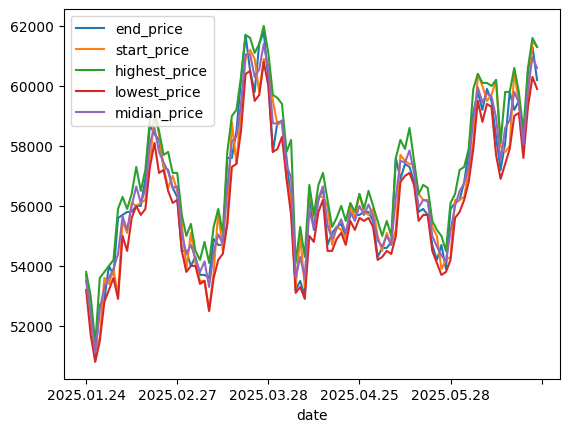

In [19]:
all_tables.plot.line()

<Axes: xlabel='date'>

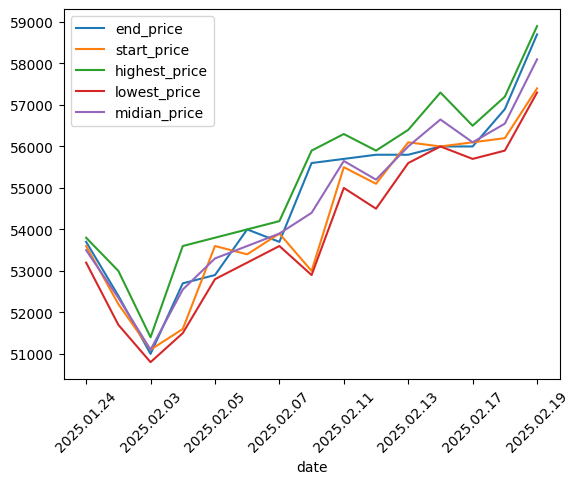

In [20]:
all_tables[:15].plot.line(rot=45)

<Axes: title={'center': 'midian_price'}, xlabel='month'>

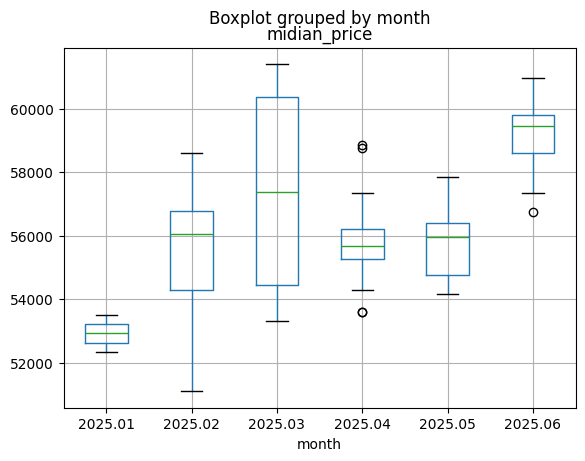

In [21]:
all_tables.boxplot(column=['midian_price'], by='month')

1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=1)
전체 0 줄에 15 줄을 추가합니다.
2 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=2)
전체 15 줄에 15 줄을 추가합니다.
3 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=3)
전체 30 줄에 15 줄을 추가합니다.
4 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=4)
전체 45 줄에 15 줄을 추가합니다.
5 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=5)
전체 60 줄에 15 줄을 추가합니다.
6 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=6)


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\3683468228.py:7: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\3683468228.py:7: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\3683468228.py:7: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\3683468228.py:7: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. 

전체 75 줄에 15 줄을 추가합니다.
7 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=7)
전체 90 줄에 15 줄을 추가합니다.


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\3683468228.py:7: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]


<Axes: title={'center': 'midian_price'}, xlabel='month'>

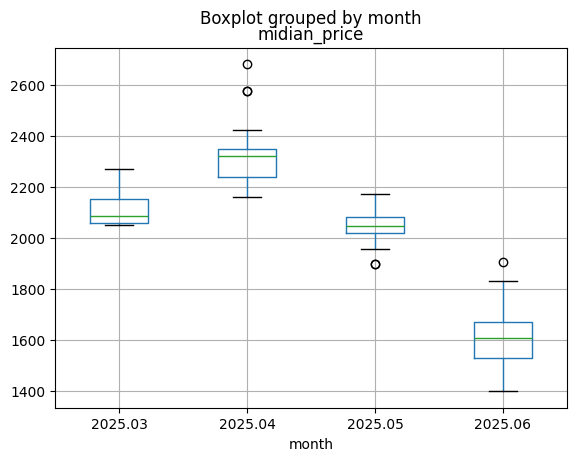

In [22]:
ex_url = "https://finance.naver.com/item/sise_day.naver?code=252670&&page="
ex_tables = pd.DataFrame()
for page_number in range(1, 8):
    full_url = ex_url + str(page_number)
    print(f'{page_number} 번째 페이지 읽어오기({full_url})')
    page = requests.get(full_url, headers=my_headers)
    table = pd.read_html(page.text)[0]
    print(f'전체 {len(ex_tables.index)} 줄에 {len(table.index)} 줄을 추가합니다.')
    ex_tables = pd.concat([ex_tables, table])
ex_tables.dropna(inplace=True)
ex_tables.rename(columns={
    '날짜': 'date',
    '종가': 'end_price',
    '시가' : 'start_price',
    '고가' : 'highest_price',
    '저가' : 'lowest_price'}
                  , inplace=True)
ex_tables.drop(['전일비', '거래량'], axis=1, inplace=True)
ex_tables['midian_price'] = ex_tables['highest_price'] - ((ex_tables['highest_price'] - ex_tables['lowest_price']) / 2)
ex_tables['month'] = ex_tables['date'].str[0:7]
ex_tables.set_index('date', inplace=True)
ex_tables.sort_index(inplace=True)
ex_tables.boxplot(column=['midian_price'], by='month')

1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=1)


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]


전체 0 줄에 15 줄을 추가합니다.
2 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=2)
전체 15 줄에 15 줄을 추가합니다.
3 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=3)
전체 30 줄에 15 줄을 추가합니다.
4 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=4)
전체 45 줄에 15 줄을 추가합니다.
5 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=5)
전체 60 줄에 15 줄을 추가합니다.
6 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=6)


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. 

전체 75 줄에 15 줄을 추가합니다.
7 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=7)


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]


전체 90 줄에 15 줄을 추가합니다.
8 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=8)
전체 105 줄에 15 줄을 추가합니다.
9 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=9)
전체 120 줄에 15 줄을 추가합니다.
10 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=10)
전체 135 줄에 15 줄을 추가합니다.
11 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=11)
전체 150 줄에 15 줄을 추가합니다.
12 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=12)


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. 

전체 165 줄에 15 줄을 추가합니다.
13 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=13)


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]


전체 180 줄에 15 줄을 추가합니다.
14 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=14)
전체 195 줄에 15 줄을 추가합니다.
15 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=15)
전체 210 줄에 15 줄을 추가합니다.
16 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=16)
전체 225 줄에 15 줄을 추가합니다.
17 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=17)


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]


전체 240 줄에 15 줄을 추가합니다.
18 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=18)


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]


전체 255 줄에 15 줄을 추가합니다.
19 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=19)
전체 270 줄에 15 줄을 추가합니다.
20 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=20)
전체 285 줄에 15 줄을 추가합니다.
21 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=21)
전체 300 줄에 15 줄을 추가합니다.
22 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=22)


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]


전체 315 줄에 15 줄을 추가합니다.
23 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=23)


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]


전체 330 줄에 15 줄을 추가합니다.
24 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=24)
전체 345 줄에 15 줄을 추가합니다.
25 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=25)
전체 360 줄에 15 줄을 추가합니다.
26 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=26)
전체 375 줄에 15 줄을 추가합니다.
27 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=27)


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]


전체 390 줄에 15 줄을 추가합니다.
28 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=28)


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]


전체 405 줄에 15 줄을 추가합니다.
29 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=29)
전체 420 줄에 15 줄을 추가합니다.
30 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=30)
전체 435 줄에 15 줄을 추가합니다.
31 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=31)


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]


전체 450 줄에 15 줄을 추가합니다.
32 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=32)


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]


전체 465 줄에 15 줄을 추가합니다.
33 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=33)
전체 480 줄에 15 줄을 추가합니다.
34 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=34)
전체 495 줄에 15 줄을 추가합니다.
35 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=35)


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]


전체 510 줄에 15 줄을 추가합니다.
36 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=36)


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. 

전체 525 줄에 15 줄을 추가합니다.
37 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=37)
전체 540 줄에 15 줄을 추가합니다.
38 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=38)
전체 555 줄에 15 줄을 추가합니다.
39 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=39)
전체 570 줄에 15 줄을 추가합니다.
40 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=40)


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]


전체 585 줄에 15 줄을 추가합니다.
41 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=41)


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. 

전체 600 줄에 15 줄을 추가합니다.
42 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=42)
전체 615 줄에 15 줄을 추가합니다.
43 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=43)
전체 630 줄에 15 줄을 추가합니다.
44 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=44)
전체 645 줄에 15 줄을 추가합니다.


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]


45 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=45)
전체 660 줄에 15 줄을 추가합니다.
46 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=46)
전체 675 줄에 15 줄을 추가합니다.
47 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=47)
전체 690 줄에 15 줄을 추가합니다.
48 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=48)


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. 

전체 705 줄에 15 줄을 추가합니다.
49 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=49)
전체 720 줄에 15 줄을 추가합니다.
50 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=252670&&page=50)
전체 735 줄에 15 줄을 추가합니다.


C:\Users\cco1215\AppData\Local\Temp\ipykernel_10256\2011855725.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]


<Axes: title={'center': 'midian_price'}, xlabel='month'>

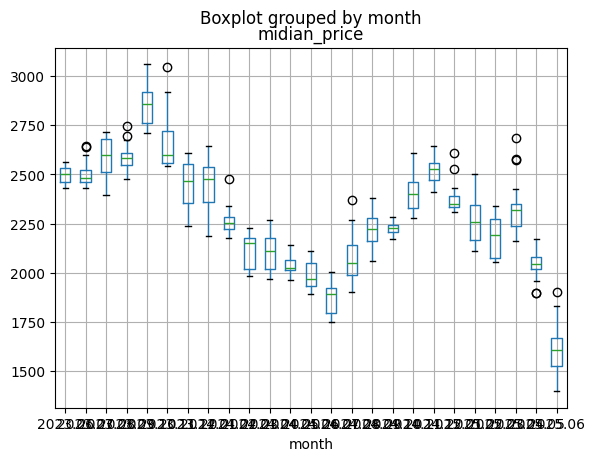

In [23]:
ex_tables = pd.DataFrame()
for page_number in range(1, 51):
    full_url = ex_url + str(page_number)
    print(f'{page_number} 번째 페이지 읽어오기({full_url})')
    page = requests.get(full_url, headers=my_headers)
    table = pd.read_html(page.text)[0]
    print(f'전체 {len(ex_tables.index)} 줄에 {len(table.index)} 줄을 추가합니다.')
    ex_tables = pd.concat([ex_tables, table])
ex_tables.drop_duplicates(inplace=True)
ex_tables.dropna(inplace=True)
ex_tables.rename(columns={
    '날짜': 'date',
    '종가': 'end_price',
    '시가' : 'start_price',
    '고가' : 'highest_price',
    '저가' : 'lowest_price'}
                  , inplace=True)
ex_tables.drop(['전일비', '거래량'], axis=1, inplace=True)
ex_tables['midian_price'] = ex_tables['highest_price'] - ((ex_tables['highest_price'] - ex_tables['lowest_price']) / 2)
ex_tables['month'] = ex_tables['date'].str[0:7]
ex_tables.set_index('date', inplace=True)
ex_tables.sort_index(inplace=True)
ex_tables.boxplot(column=['midian_price'], by='month')
